<a href="https://colab.research.google.com/github/jasmineA20/psychic-broccoli/blob/main/SIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


#Fit parameters
k     = 0.08617
delta = 1
T     = 1.38
gamma = 0.05
beta  = 1/(k*T)

In [6]:
def z(e):
  return e - gamma * 1.0j

In [7]:
#Define Functions

#BCS DOS
# with gaussian
def N(e):
    return np.abs(np.real(z(e)/np.sqrt(z(e)**2 - delta**2)))


def f(e):
    return 1/(1 + np.exp(beta))



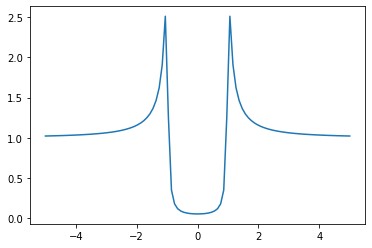

In [8]:
n    = np.vectorize(N)
eval = np.linspace(-5,5,100)

#BCS density of states plot
#print(n(eval,delta,gamma))
plt.plot(eval,n(eval))
plt.show()



In [9]:
def fp(e):
    return -1*(1/(k*T))*np.exp(-e/(k*T))/((1+np.exp(-e/(k*T)))**2)

In [10]:
def integrand(e,v,delta):
  return np.abs(N(e,delta)*fp(e-v))

Only BCS DOS

In [11]:
#effective pairing potentials of the normal and superconducting layer
DeltaS = 1.38 
DeltaN = 0.001

Rhigh=0.085 
Rlow=0.025

k = 0.08617
dl = 0.03
T = 1.5


In [12]:
def N(e,Delta):
    return e/np.sqrt(e**2-Delta**2+0j)

#Fermi-Dirac Distribution
def f(e):
    return 1/(1+np.exp(-e/(k*T)))

def fp(e):
    return -1*(1/(k*T))*np.exp(-e/(k*T))/((1+np.exp(-e/(k*T)))**2)


def bcsintgnd(e,v,Delta):
    return np.abs(N(e,Delta))*(-fp(e-v))

In [13]:
xmin    = 0
xmax    = 8

vr      = np.linspace(xmin,xmax,100)#200
didvr   = [[],[],[]]
cutoff  = 5

for v in vr:
    didvr[0].append(quad(bcsintgnd,Delta,v+cutoff,args=(v,Delta),limit=100)[0])

plt.figure(1)

plt.axis([xmin,xmax,0,2.5])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)
plt.plot(vr,didvr[0],color="blue",linewidth=3)
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)

#a = plt.axes([.53,.16,.34,.34],facecolor='#ededed')

NameError: ignored

**From the Proximity model**

In [14]:
xmin = 0
xmax = 3

In [15]:
#Functions from the Proximity Model DOS
def Omega(e,Delta):
    return np.sqrt(e**2-Delta**2+0j)

def F(e):
    return (e**2 - DeltaS*DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def G(e):
    return e*(DeltaS-DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def DKd(e,dl,R):  
    return R*Omega(e,DeltaN)+dl*1j

def sigma(e,dl,R):
    return np.imag( ((e/Omega(e,DeltaN))*( F(e)*np.cos(DKd(e,dl,R))*1j + np.sin(DKd(e,dl,R)) )+1j*G(e)*DeltaN/Omega(e,DeltaN))/(np.cos(DKd(e,dl,R)) - F(e)*np.sin(DKd(e,dl,R))*1j) )


In [16]:
def intgnd(e,v,dl,R):
    return np.abs(sigma(e,dl,R))*(-fp(e-v))

def bcsintgnd(e,v,Delta):
    return np.abs(N(e,Delta))*(-fp(e-v))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Per

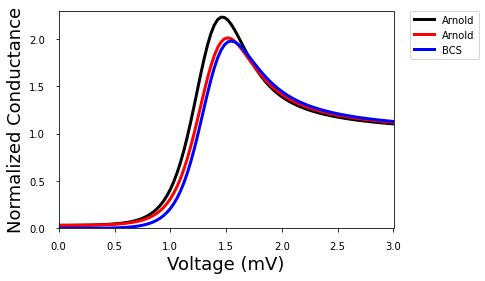

In [17]:
vr = np.linspace(xmin,xmax,100)#200
didvr = [[],[],[],[]]
cutoff=5
for v in vr:
    didvr[0].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rhigh),limit=100)[0])
    didvr[1].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rlow),limit=100)[0])
    didvr[2].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,DeltaS),limit=100)[0])
    #didvr[3].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,0.02),limit=100)[0])
    #didvr[3].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.02),limit=100)[0])

plt.axis([xmin,xmax,0,2.3])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)
plt.plot(vr,didvr[0],color="black",linewidth=3,label='Arnold')
plt.plot(vr,didvr[1],color="red",linewidth=3,label='Arnold')
plt.plot(vr,didvr[2],color="blue",linewidth=3,label='BCS')
#plt.plot(vr,didvr[3],color="blue",linewidth=3,label='Arnold')
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


Normalized conductance calculated with three different values of R compared with the BCS DOS.

In [105]:
xmin = -2
xmax =  2
ymin =  0
ymax =  65
delta = 1.38
R    = np.linspace(0.04,0.2,9)#200
vr   = np.linspace(xmin,xmax,1500)#200
eval = np.linspace(xmin,xmax,1500)

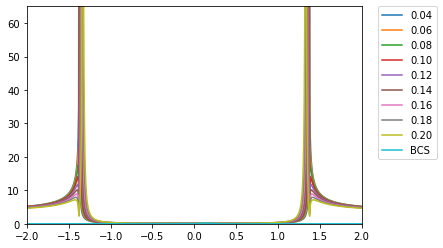

In [106]:
fig, ax = plt.subplots()
ax.axis([xmin,xmax,ymin,ymax])
ax.plot(vr,intgnd(eval,vr,dl,0.04),label='0.04')
ax.plot(vr,intgnd(eval,vr,dl,0.06),label='0.06')
ax.plot(vr,intgnd(eval,vr,dl,0.08),label='0.08')
ax.plot(vr,intgnd(eval,vr,dl,0.10),label='0.10')
ax.plot(vr,intgnd(eval,vr,dl,0.12),label='0.12')
ax.plot(vr,intgnd(eval,vr,dl,0.14),label='0.14')
ax.plot(vr,intgnd(eval,vr,dl,0.16),label='0.16')
ax.plot(vr,intgnd(eval,vr,dl,0.18),label='0.18')
ax.plot(vr,intgnd(eval,vr,dl,0.20),label='0.20')
ax.plot(vr,bcsintgnd(eval,dl,delta),label='BCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [113]:
import matplotlib.colors as mpl

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

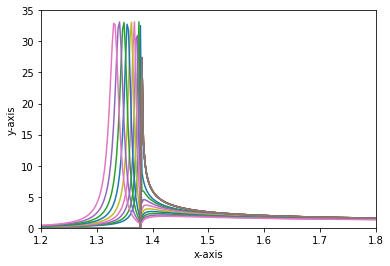

In [124]:
# colormap
cmap = plt.get_cmap('jet', 2)

fig, ax = plt.subplots()
ax.axis([1.2,1.8,ymin,35])
for i in range(0,9):
    ax.plot(vr,sigma(eval,dl,R[i]))
    ax.plot(vr,N(eval,delta),label='BCS')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
    
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


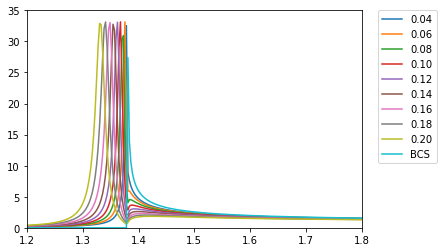

In [107]:
fig, ax = plt.subplots()
ax.axis([1.2,1.8,ymin,35])
ax.plot(vr,sigma(eval,dl,0.04),label='0.04')
ax.plot(vr,sigma(eval,dl,0.06),label='0.06')
ax.plot(vr,sigma(eval,dl,0.08),label='0.08')
ax.plot(vr,sigma(eval,dl,0.10),label='0.10')
ax.plot(vr,sigma(eval,dl,0.12),label='0.12')
ax.plot(vr,sigma(eval,dl,0.14),label='0.14')
ax.plot(vr,sigma(eval,dl,0.16),label='0.16')
ax.plot(vr,sigma(eval,dl,0.18),label='0.18')
ax.plot(vr,sigma(eval,dl,0.20),label='0.20')
ax.plot(vr,N(eval,delta),label='BCS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [97]:
xmin = 0
xmax = 3
ymin = 0
ymax = 3.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


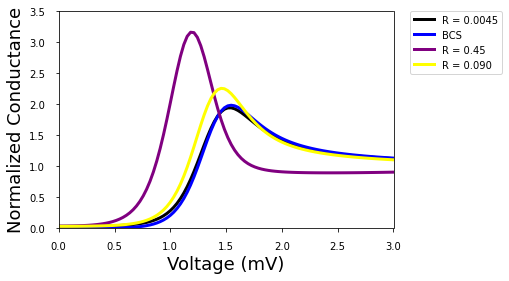

In [98]:
vr = np.linspace(xmin,xmax,100)#200
didvr = [[],[],[],[]]
cutoff=5
for v in vr:
    didvr[0].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.0045),limit=100)[0])
    didvr[1].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,DeltaS),limit=100)[0])
    didvr[2].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.45),limit=100)[0])
    didvr[3].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.090),limit=100)[0])

plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)

plt.plot(vr,didvr[0],color="black",linewidth=3,label='R = 0.0045')
plt.plot(vr,didvr[1],color="blue",linewidth=3,label='BCS')
plt.plot(vr,didvr[2],color="purple",linewidth=3,label='R = 0.45')
plt.plot(vr,didvr[3],color="yellow",linewidth=3,label='R = 0.090')

plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Arnold proximity DOS. Arnold proximity DOS compared to BCS DOS (dashed blue line) for various R values showing the distinct Andreev bound state below S, which is seen more clearly for larger R values.

In [99]:
R = np.linspace(0.04,0.2,10)
xmin = 1
xmax = 1.8
ymin = 0
ymax = 5

dl = 0.03
T = 0.75

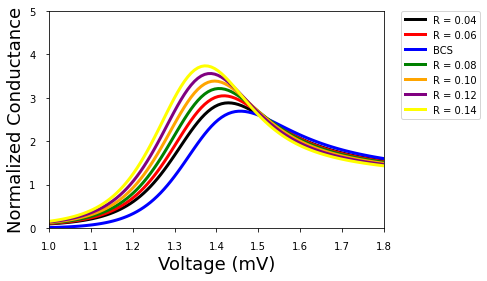

In [100]:
vr = np.linspace(xmin,xmax,100)#200
didvr = [[],[],[],[],[],[],[]]
cutoff=5
for v in vr:
    didvr[0].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.04),limit=100)[0])
    didvr[1].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.06),limit=100)[0])
    didvr[2].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,DeltaS),limit=100)[0])
    didvr[3].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.08),limit=100)[0])
    didvr[4].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.10),limit=100)[0])
    didvr[5].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.12),limit=100)[0])
    didvr[6].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,0.14),limit=100)[0])

plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)

plt.plot(vr,didvr[0],color="black",linewidth=3,label='R = 0.04')
plt.plot(vr,didvr[1],color="red",linewidth=3,label='R = 0.06')
plt.plot(vr,didvr[2],color="blue",linewidth=3,label='BCS')
plt.plot(vr,didvr[3],color="green",linewidth=3,label='R = 0.08')
plt.plot(vr,didvr[4],color="orange",linewidth=3,label='R = 0.10')
plt.plot(vr,didvr[5],color="purple",linewidth=3,label='R = 0.12')
plt.plot(vr,didvr[6],color="yellow",linewidth=3,label='R = 0.14')

plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


Loop. 